In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
def generate_random_graph(node_count, connectivity):
    G = nx.Graph()

    # Add nodes to the graph
    G.add_nodes_from(range(1, node_count + 1))

    # Ensure at least min_edges are added for connectivity

    # Add edges to achieve the desired connectivity
    while len(list(nx.isolates(G))) >0:
        node1 = random.randint(1, node_count)
        node2 = random.randint(1, node_count)
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)

    # Add remaining edges randomly
    remaining_edges = int(node_count * (node_count - 1) * connectivity / 2)
    for _ in range(remaining_edges):
        node1 = random.randint(1, node_count)
        node2 = random.randint(1, node_count)
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)

    return G


In [5]:
def visualize_graph(G):
    pos = nx.spring_layout(G)  # You can use other layouts as well

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='black', width=1.5)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)

    # Draw node labels
    node_labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

    plt.title("Graph Visualization")
    plt.show()

In [6]:
def random_walk(graph):
    visited_edges = set()
    walked_edges = []
    nodes = list(graph.nodes())
    
    current_node = random.choice(nodes)
    while len(visited_edges) < graph.number_of_edges():
        
        neighbors = list(graph.neighbors(current_node))
        next_node = random.choice(neighbors)
        walked_edge = (current_node, next_node)
        edge = (min(current_node, next_node), max(current_node, next_node))

        visited_edges.add(edge)
        
        walked_edges.append(walked_edge)
        #print(f"Visited edge: {walked_edge}")
        current_node = next_node

    return walked_edges

In [94]:
def add_weights_to_edges_from_dict(graph, weights_dict):
    for edge, weight in weights_dict.items():
        if graph.has_edge(*edge):
            graph[edge[0]][edge[1]]['weight'] = np.sqrt( np.log(1/weight)) *10
        elif graph.has_edge(*reversed(edge)):
            graph[reversed(edge)[0]][reversed(edge)[1]]['weight'] = np.sqrt( np.log(1/weight)) *10
        else:
            print(f"Edge {edge} not found in the graph.")

In [103]:
def probabilistic_walk(graph):
    visited_edges = set()
    walked_edges = []
    nodes = list(graph.nodes())
    
    current_node = random.choice(nodes)
    while len(visited_edges) < graph.number_of_edges():
        neighbors = list(graph.neighbors(current_node))
        weights = [graph[current_node][neighbor].get('weight', 1) for neighbor in neighbors]
        if len(weights) == 0:
            print("some fuckery")

        # Normalize weights to create probabilities
        try:
            probabilities = [weight / sum(weights) for weight in weights]
        except:
            print(weights)
            return
            

        next_node = random.choices(neighbors, weights=probabilities)[0]
        edge = (min(current_node, next_node), max(current_node, next_node))

        visited_edges.add(edge)
        walked_edges.append(edge)
        #print(f"Visited edge: {edge}")
        
        graph[current_node][next_node]['weight'] = np.sqrt(graph[current_node][next_node]['weight'])
        
        
        current_node = next_node

    return walked_edges

In [9]:
def cpp(graph):
    # Check if the graph is connected
    if not nx.is_connected(graph):
        raise ValueError("Graph must be connected for the Chinese Postman Problem.")

    # Check if the graph has nodes with odd degree
    odd_nodes = [node for node, degree in graph.degree() if degree % 2 != 0]

    # Create a copy of the graph to modify
    modified_graph = graph.copy()

    # Add edges to connect nodes with odd degree (if any)
    if len(odd_nodes) == 2:
        modified_graph.add_edge(odd_nodes[0], odd_nodes[1])

    # Find an Eulerian circuit
    eulerian_circuit = list(nx.eulerian_circuit(modified_graph))

    # Compute the length of the Eulerian circuit
    circuit_length = sum(modified_graph[edge[0]][edge[1]].get('weight', 1) for edge in eulerian_circuit)

    return circuit_length

In [10]:
def visualize_walk(graph, walked_edges):
    pos = nx.spring_layout(graph)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, edge_color='black', width=1.5)

    # Draw walked edges in a different color
    nx.draw_networkx_edges(graph, pos, edgelist=walked_edges, edge_color='red', width=2)

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=700)

    # Draw node labels
    node_labels = {node: node for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=8)

    plt.title("Walk Visualization")
    plt.show()

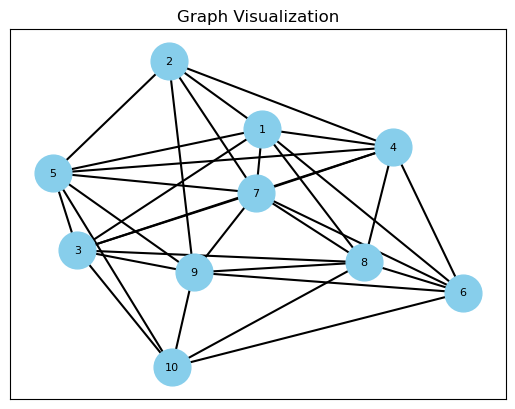

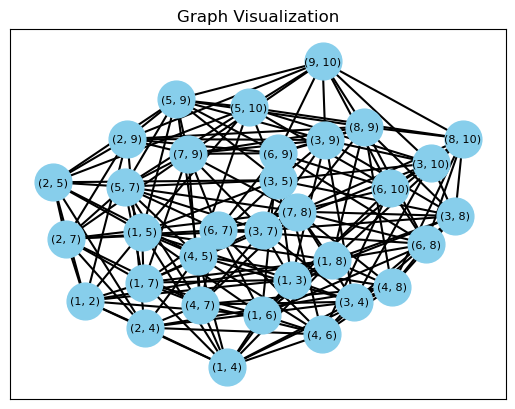

{(4, 5): 0.03151451607141548,
 (5, 7): 0.03353778498550702,
 (3, 4): 0.03140826798681441,
 (3, 10): 0.027214271534780534,
 (2, 7): 0.02914015574660766,
 (6, 7): 0.03140214234719301,
 (7, 8): 0.033483503501462286,
 (4, 7): 0.03345841735223482,
 (1, 3): 0.03140826798681441,
 (3, 9): 0.03155204419471813,
 (5, 9): 0.0316582922793192,
 (1, 5): 0.03151451607141547,
 (1, 7): 0.03345841735223483,
 (8, 10): 0.02726548202800456,
 (9, 10): 0.027381528914376483,
 (4, 6): 0.02936770907169613,
 (8, 9): 0.03160452764097864,
 (1, 4): 0.031435909493459466,
 (5, 10): 0.027317947770496977,
 (3, 7): 0.03343051341230243,
 (4, 8): 0.03146075143307492,
 (6, 8): 0.02939226855451152,
 (3, 5): 0.03148687456477042,
 (6, 9): 0.02950987271629337,
 (3, 8): 0.031433109926429864,
 (2, 5): 0.027170041053019504,
 (1, 6): 0.029367709071696134,
 (6, 10): 0.025140503691503564,
 (7, 9): 0.03360358703884043,
 (2, 4): 0.027093346289027206,
 (1, 8): 0.03146075143307492,
 (1, 2): 0.027093346289027202,
 (2, 9): 0.02723362219689

In [114]:
node_count = 10
connectivity = 1

G = generate_random_graph(node_count, connectivity)
L_G = nx.line_graph(G)
PR = nx.pagerank(L_G,max_iter=100)
visualize_graph(G)
visualize_graph(L_G)
PR

In [115]:

def edges_without_weights(graph):
    edges_without_weights = []
    for edge in graph.edges():
        if 'weight' not in graph[edge[0]][edge[1]] or graph[edge[0]][edge[1]]['weight'] == 0.0:
            edges_without_weights.append(edge)

    return edges_without_weights


In [116]:
WalkLens = []
for i in range(10000):
    WalkLens.append(len(random_walk(G)))
print("average random walk length in G: ",sum(WalkLens)/len(WalkLens))

average random walk length in G:  151.0085


In [117]:
min(WalkLens)

56

In [118]:
add_weights_to_edges_from_dict(G,PR)
edges_without_weights(G)

[]

In [119]:
PR[(1,3)]

0.03140826798681441

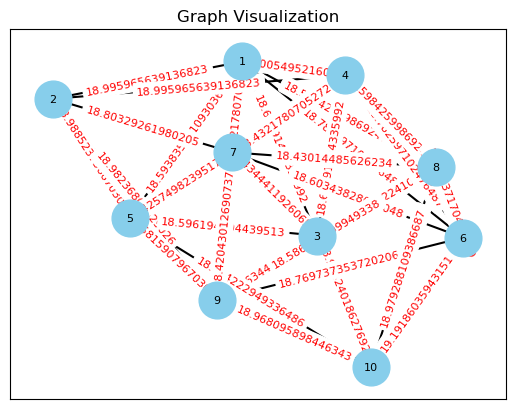

In [120]:
visualize_graph(G)

In [121]:
import copy
WalkLens = []
for i in range(10000):
    tmp=copy.deepcopy(G)
    WalkLens.append(len(probabilistic_walk(tmp)))
print("average random walk length in G: ",sum(WalkLens)/len(WalkLens))

average random walk length in G:  60.1126


In [123]:
G.number_of_edges()

33

In [122]:
min(WalkLens)

37

In [19]:
import numpy as np

In [35]:
v_arr = np.array(list(PR.values()))

for i in range (10000):
    gr = generate_random_graph(node_count, connectivity)
    lg = nx.line_graph(gr)
    pager = nx.pagerank(lg,max_iter=100)

    v_arr = np.append(v_arr,np.array(list(pager.values())))

print(v_arr)

[0.02703465 0.03196562 0.03728114 ... 0.02934537 0.02731172 0.02179301]


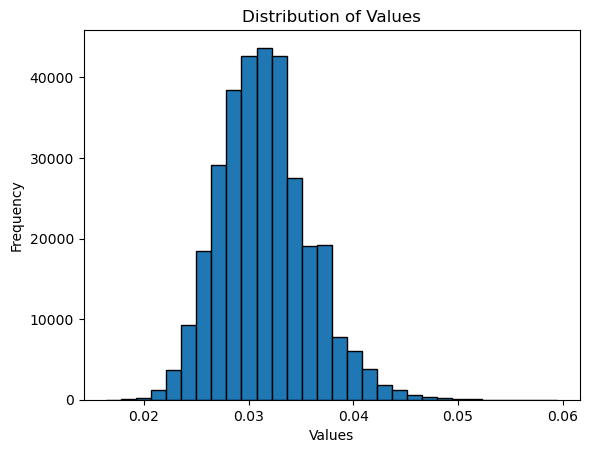

In [36]:
plt.hist(v_arr, bins=30, edgecolor='black', align='mid')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# Show the plot
plt.show()


In [37]:
np.std(v_arr)

0.004247717233146377

In [38]:
from scipy.stats import shapiro
stat, p_value = shapiro(v_arr)

# Print the result
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Check the p-value
if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.98762446641922
p-value: 0.0
The data does not appear to be normally distributed.


e:\Anaconda\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


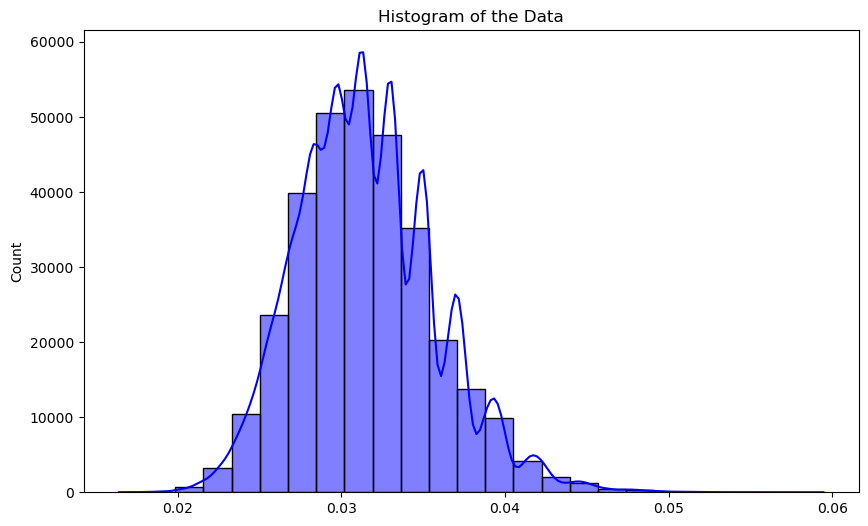

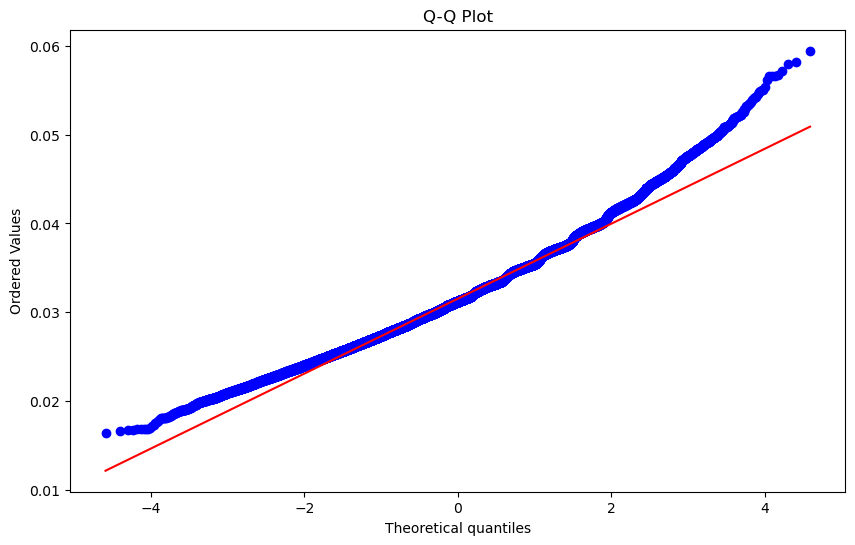

In [60]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(v_arr, kde=True, color='blue', bins=25)
plt.title("Histogram of the Data")
plt.show()

import scipy.stats as stats
# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(v_arr, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [134]:
random_walks = []
probabilistic_walks = []
edge_count = []
connectivity = 1

for i in range(10,30):
    G = generate_random_graph(i, connectivity)
    edge_count.append(G.number_of_edges())
    L_G = nx.line_graph(G)
    PR = nx.pagerank(L_G,max_iter=i*10)
    add_weights_to_edges_from_dict(G,PR)
    r_tmp =[]
    for i in range(1000):
        r_tmp.append(len(random_walk(G)))
    p_tmp = []
    for i in range(1000):
        tmp=copy.deepcopy(G)
        p_tmp.append(len(probabilistic_walk(tmp)))
    random_walks.append(r_tmp)
    probabilistic_walks.append(p_tmp)

In [128]:
random_walks

[[98,
  153,
  138,
  133,
  149,
  134,
  110,
  91,
  130,
  118,
  129,
  97,
  67,
  173,
  98,
  177,
  156,
  109,
  205,
  90,
  88,
  180,
  117,
  126,
  238,
  201,
  106,
  143,
  87,
  105,
  112,
  113,
  117,
  64,
  153,
  120,
  113,
  129,
  194,
  166,
  115,
  126,
  95,
  123,
  105,
  161,
  68,
  114,
  163,
  157,
  116,
  112,
  150,
  104,
  165,
  130,
  94,
  167,
  72,
  91,
  128,
  94,
  100,
  135,
  80,
  75,
  203,
  117,
  95,
  120,
  125,
  120,
  120,
  99,
  113,
  123,
  65,
  141,
  182,
  76,
  152,
  135,
  105,
  109,
  146,
  67,
  109,
  174,
  140,
  89,
  141,
  86,
  69,
  84,
  90,
  106,
  74,
  95,
  108,
  110,
  72,
  102,
  301,
  99,
  142,
  233,
  121,
  88,
  132,
  132,
  113,
  249,
  74,
  194,
  122,
  98,
  147,
  91,
  146,
  124,
  123,
  84,
  132,
  88,
  99,
  234,
  125,
  96,
  80,
  147,
  92,
  221,
  126,
  161,
  152,
  93,
  67,
  140,
  234,
  224,
  77,
  131,
  153,
  103,
  71,
  135,
  87,
  87,
  216,
  65

In [126]:
for i in random_walks:
    print(np.average(i))


125.3272
199.8536
257.4594
276.1032
314.0126
386.9005
444.1928
496.6457
536.7823
692.3829
750.4484
835.958
880.5674
962.8486
1048.4931
1243.3966
1334.8776
1406.1987
1687.3815
1859.3071


In [127]:
for i in probabilistic_walks:
    print(np.average(i))

51.3098
77.1043
96.2818
103.0827
115.552
138.4562
156.2885
172.8725
185.2381
231.6529
250.0118
274.0422
289.5647
313.69
338.3264
392.572
419.8678
438.3938
515.6951
563.632


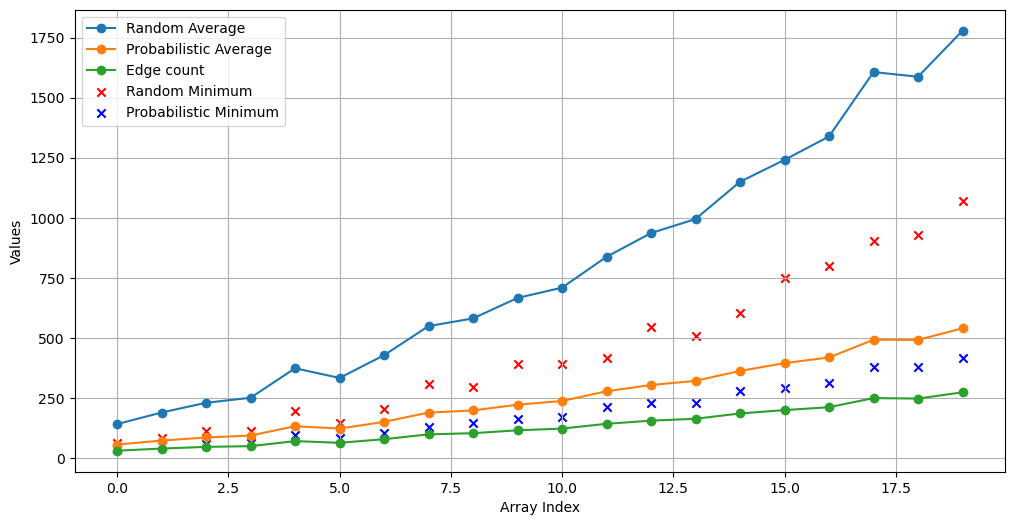

In [135]:
np_r = np.array(random_walks)
np_p = np.array(probabilistic_walks)

avg_r = np.mean(np_r,axis=1)
avg_p = np.mean(np_p,axis=1)

min_r = np.min(np_r,axis=1)
min_p = np.min(np_p,axis=1)

np_e = np.array(edge_count)

plt.figure(figsize=(12, 6))

plt.plot( avg_r, label='Random Average', marker='o')
plt.plot( avg_p, label='Probabilistic Average', marker='o')
plt.plot( np_e, label='Edge count', marker='o')

# Plot minimums
plt.scatter(range(len(min_r)), min_r, color='red', label='Random Minimum', marker='x')
plt.scatter(range(len(min_p)), min_p, color='blue', label='Probabilistic Minimum', marker='x')

plt.xlabel('Array Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

